# Principal Component Analysis

## import library

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [65]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

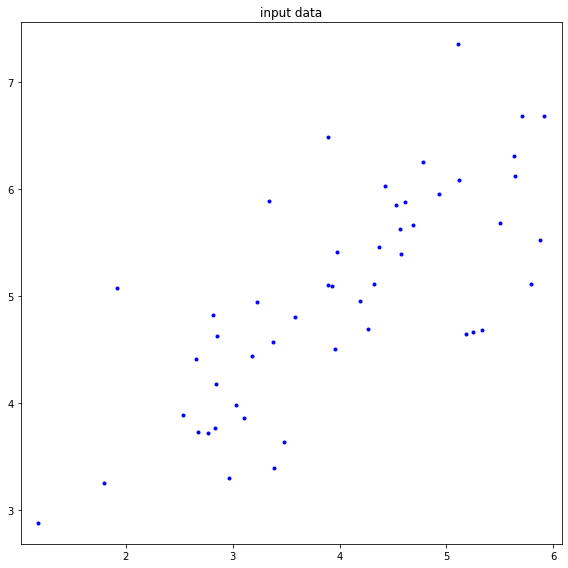

In [66]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================

plt.scatter(x,y, c="b", marker=".")

plt.axis('equal')

# ===================================================
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

(2,)
[3.9892652 5.002806 ]
mean of x =  3.989265199999999
mean of y =  5.002806
std of x =  5.861977570020827e-14
std of y =  2.0872192862952943e-14


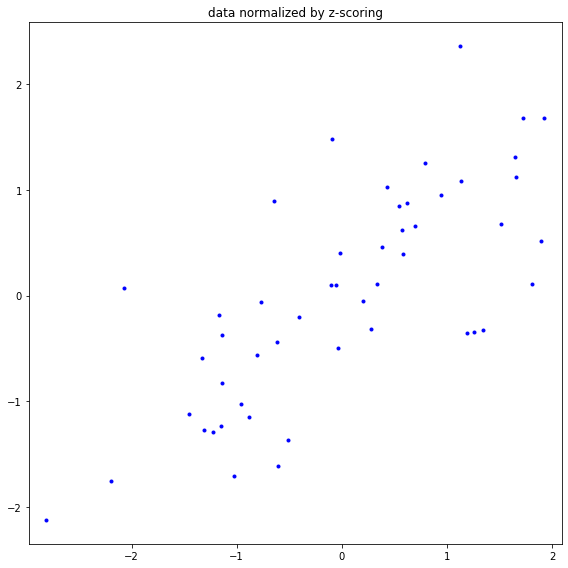

In [67]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
# ===================================================
avg = feature.sum(axis=0)/number_data 
print(avg.shape)
print(avg)
print('mean of x = ',avg[0])
print('mean of y = ',avg[1])
temp = avg 
for i in range(np.size(feature, 0)-1):
    temp = np.vstack([temp,avg])
Zfeature = feature - temp
std = Zfeature.sum(axis=0)
print('std of x = ',std[0])
print('std of y = ',std[1])

plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

## compute covariance matrix

In [68]:
def compute_covariance(feature):
    # ===================================================
    Sigma = (feature.T@feature)/number_data
    # ===================================================
    return Sigma

## compute principal directions

In [69]:
def compute_eigen(X):
    # ===================================================
    u, U = np.linalg.eig(X)
    S = np.identity(number_feature)
    for i in range(number_feature):
        S[i][i] = u[i]
    # ===================================================
    return S, U

In [70]:
covariance = compute_covariance(Zfeature)
S,U = compute_eigen(covariance)

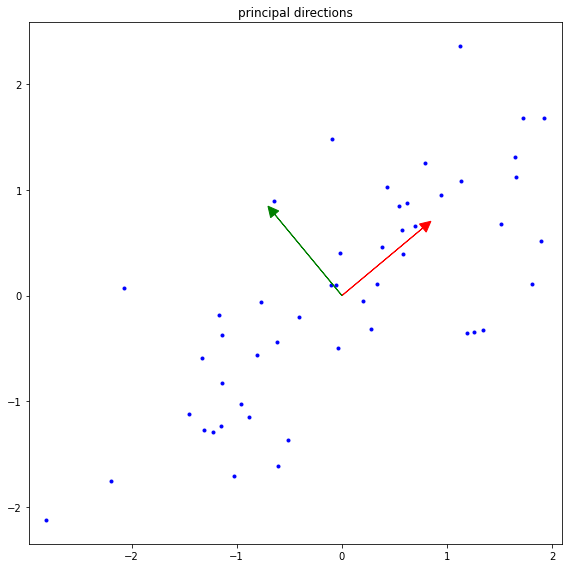

In [71]:
plt.figure(figsize=(8,8))
plt.title('principal directions')
# ===================================================
plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.arrow( 0, 0, U[0][0], U[1][0], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0, 0, U[0][1], U[1][1], head_width = 0.1, head_length = 0.1, color = 'green')

plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

## first principal axis

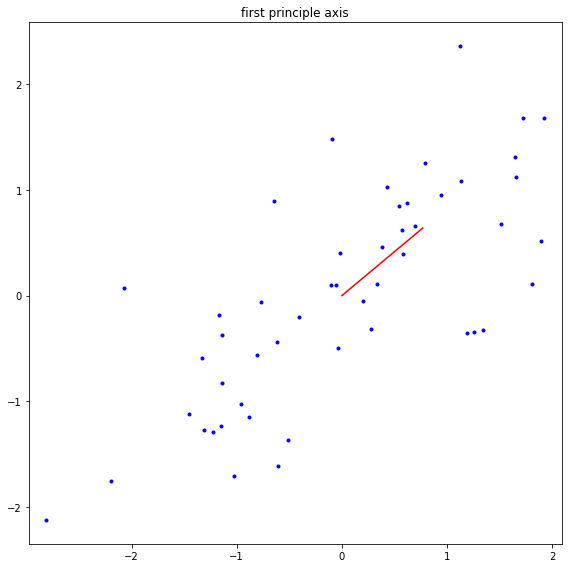

In [72]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')
# ===================================================
plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.plot([ 0,U[0][0]],[0, U[1][0]], color = 'red')

plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

## second principal axis

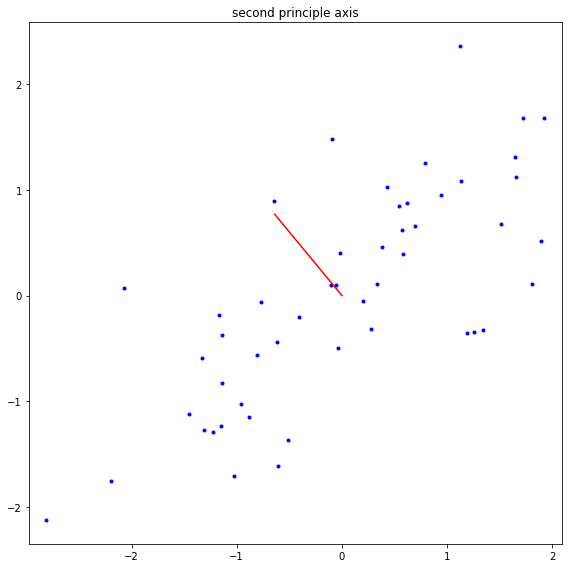

In [73]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')
# ===================================================
plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.plot([ 0,U[0][1]],[0, U[1][1]], color = 'red')

plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [74]:
def compute_projection_onto_line(feature, vector):
    # ===================================================
    t_v = feature@vector.reshape(2,1)
    projection = t_v@vector.reshape(1,2)
    # ===================================================
    return projection

## projcet to the first principal axis

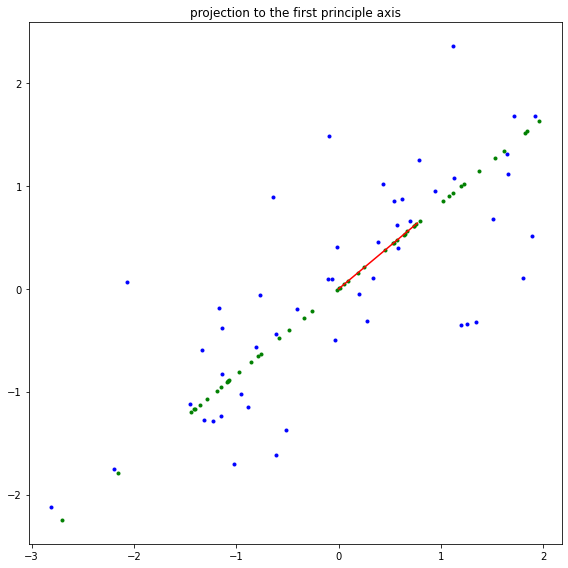

In [77]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
# ===================================================
projection = compute_projection_onto_line(Zfeature,U[:,0])

plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.plot([ 0,U[0][0]],[0, U[1][0]], color = 'red')

plt.scatter(projection[:,0],projection[:,1], c="g", marker=".")


plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

## projcet to the second principal axis

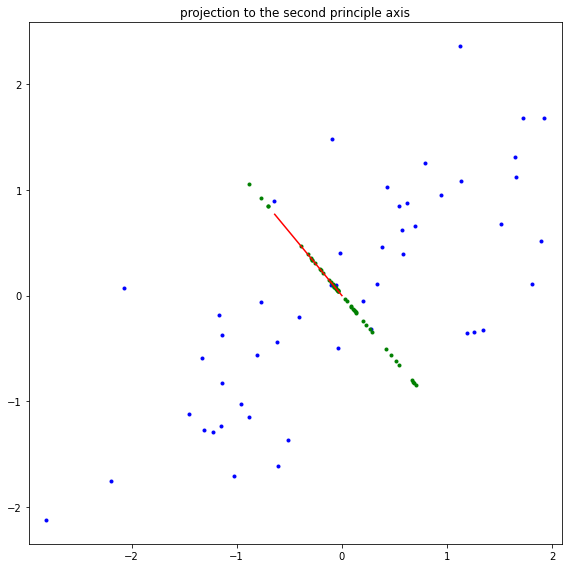

In [79]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
projection = compute_projection_onto_line(Zfeature,U[:,1])

plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.plot([ 0,U[0][1]],[0, U[1][1]], color = 'red')

plt.scatter(projection[:,0],projection[:,1], c="g", marker=".")


plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

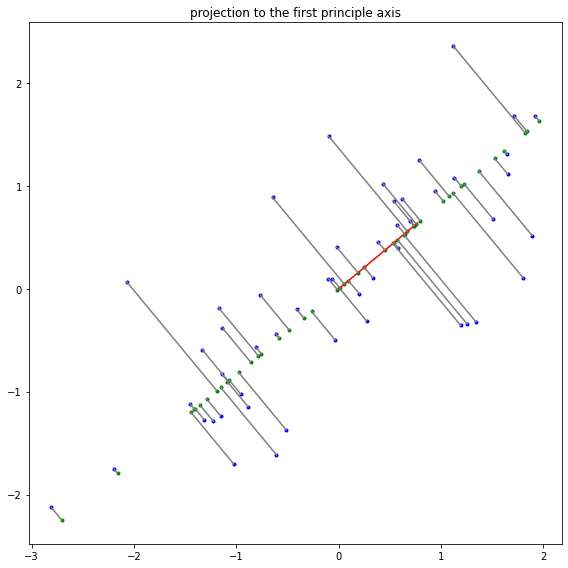

In [80]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
# ===================================================
projection = compute_projection_onto_line(Zfeature,U[:,0])

plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.plot([ 0,U[0][0]],[0, U[1][0]], color = 'red')

plt.scatter(projection[:,0],projection[:,1], c="g", marker=".")

for i in range(number_data):
    plt.plot([Zfeature[i,0],projection[i,0]],[Zfeature[i,1],projection[i,1]], color = 'gray') 

plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

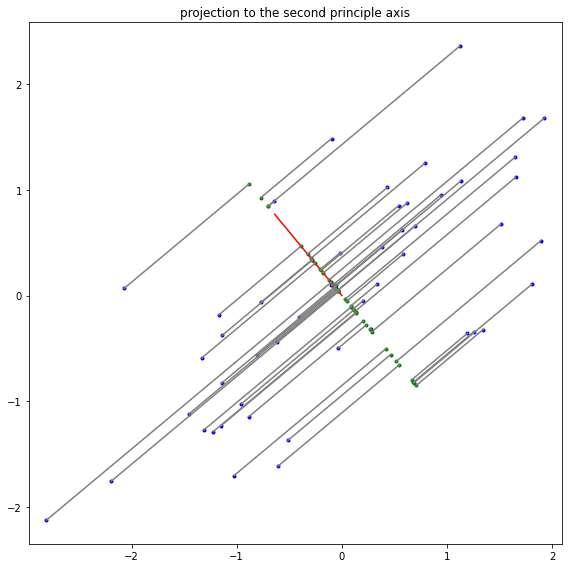

In [81]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
projection = compute_projection_onto_line(Zfeature,U[:,1])

plt.scatter(Zfeature[:,0],Zfeature[:,1], c="b", marker=".")

plt.plot([ 0,U[0][1]],[0, U[1][1]], color = 'red')

plt.scatter(projection[:,0],projection[:,1], c="g", marker=".")

for i in range(number_data):
    plt.plot([Zfeature[i,0],projection[i,0]],[Zfeature[i,1],projection[i,1]], color = 'gray') 

plt.axis('equal')
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

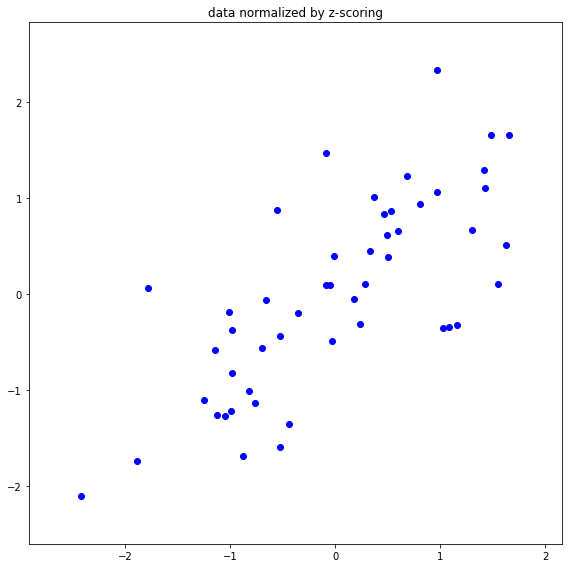

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

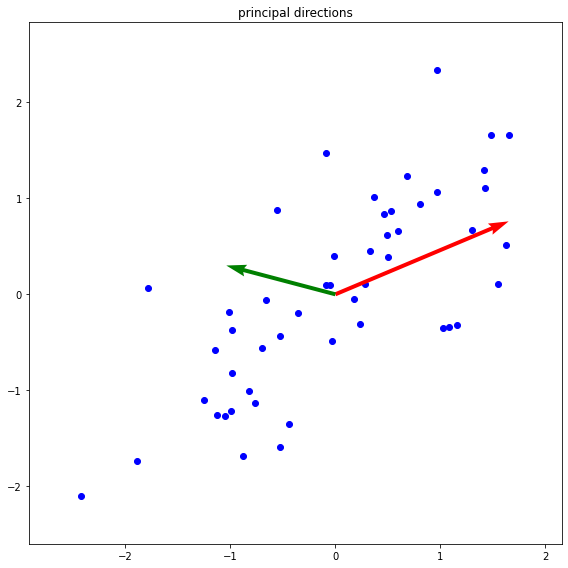

***

### 3. plot the first principal axis in red on the normalized data in blue

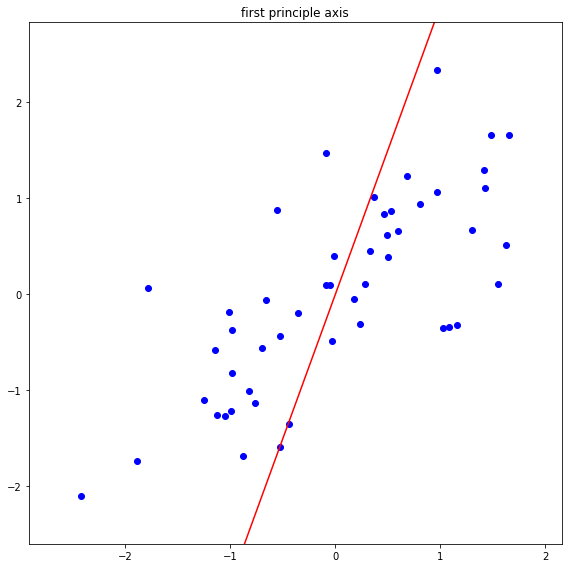

***

### 4. plot the second principal axis in red on the normalized data in blue

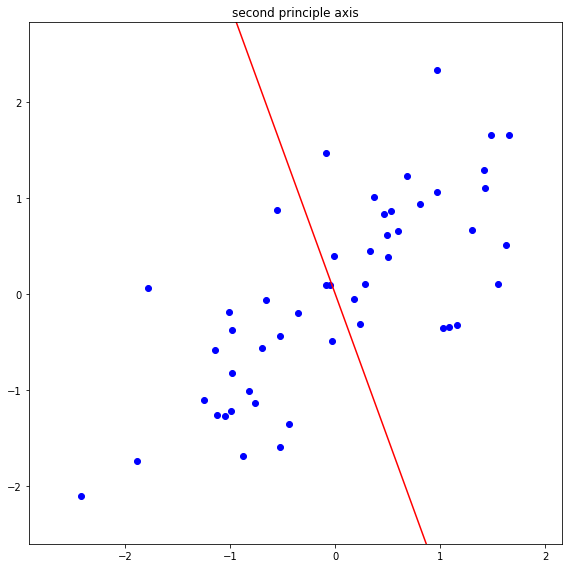

***

### 5. plot the projection of data in green onto the first principal axis in red

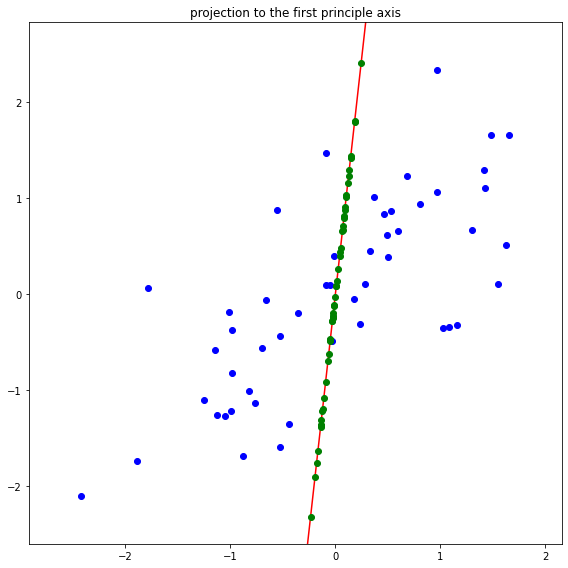

***

### 6. plot the projection of data in green onto the second principal axis in red

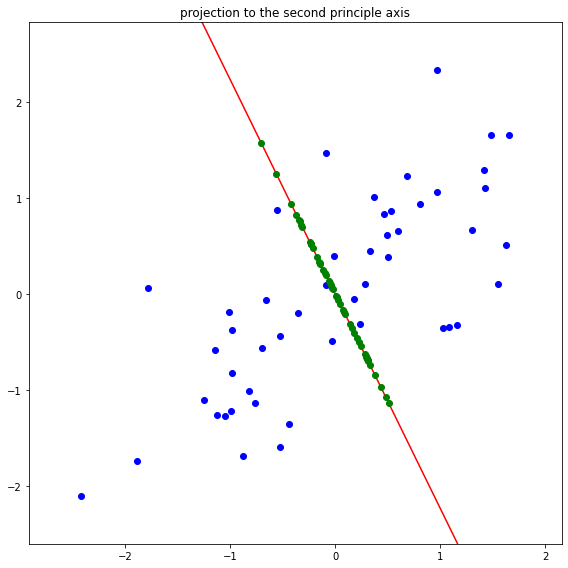

***

### 7. plot the projection line in grey onto the first principal axis

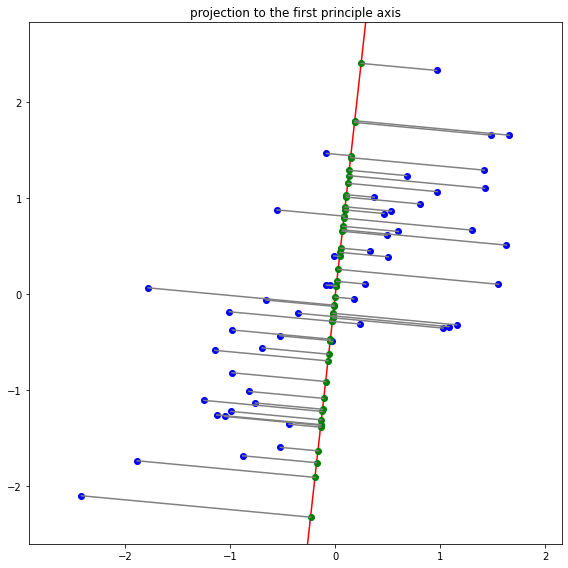

***

### 8. plot the projection line in grey onto the second principal axis

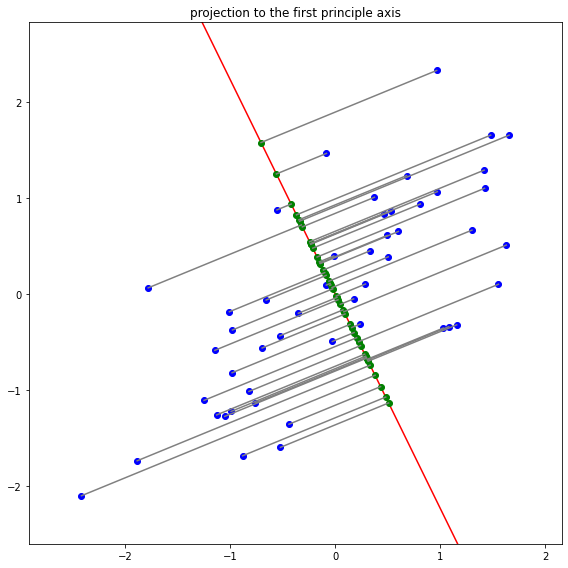

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***